# MiNet: A Convolutional Neural Network for the Detection of Minerals

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Data

In [3]:
path = Path('data/minet/')

In [4]:
tfms = get_transforms(flip_vert=True)

In [5]:
np.random.seed(352)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=224, bs=32).normalize(imagenet_stats)

**let's take a look at some of the images**

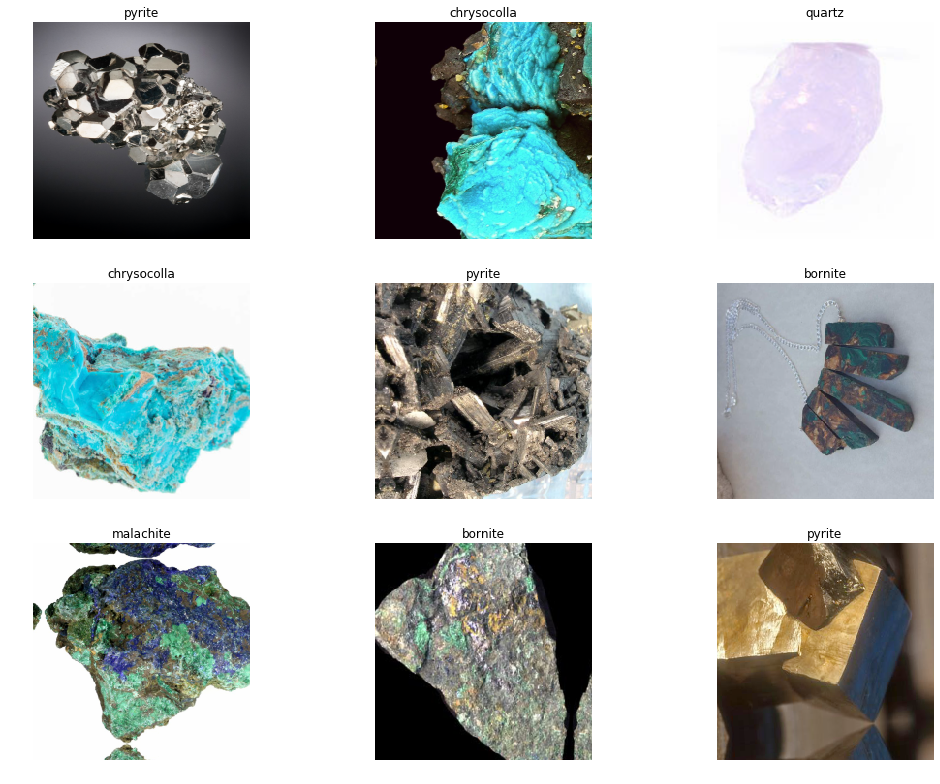

In [6]:
data.show_batch(3, figsize=(15, 11))

In [7]:
data.classes

['biotite',
 'bornite',
 'chrysocolla',
 'malachite',
 'muscovite',
 'pyrite',
 'quartz']

## Model

In [10]:
learn = cnn_learner(data, models.densenet121, metrics=[error_rate, Precision(), Recall()])

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


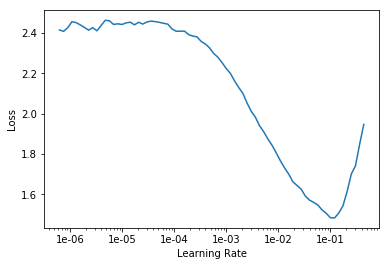

In [12]:
learn.recorder.plot()

In [13]:
lr = 1e-2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,1.208443,0.605391,0.204188,0.755975,0.768166,00:20
1,0.787707,0.511225,0.204188,0.766183,0.763064,00:19
2,0.595544,0.473127,0.151832,0.846375,0.817487,00:18
3,0.463418,0.416286,0.109948,0.850977,0.862156,00:17
4,0.354268,0.392989,0.115183,0.850063,0.863753,00:18


/opt/anaconda3/lib/python3.7/site-packages/fastai/metrics.py:186: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [13]:
learn.save('stage-1-dn121')

### Unfreeze and finetune

In [17]:
learn.load('stage-1-dn121');

In [14]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


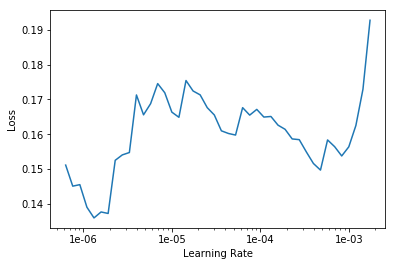

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(10, slice(1e-5, lr/10))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,0.163799,0.386716,0.109948,0.855377,0.870369,00:20
1,0.156813,0.381454,0.115183,0.851732,0.857353,00:21
2,0.154070,0.364434,0.115183,0.876273,0.862176,00:21
3,0.148381,0.317917,0.094241,0.883790,0.880754,00:22
4,0.133152,0.324184,0.078534,0.927770,0.902874,00:20
5,0.133140,0.334765,0.115183,0.873612,0.862494,00:20
6,0.111958,0.346590,0.094241,0.896835,0.880754,00:19
7,0.092778,0.351246,0.094241,0.895338,0.883765,00:20
8,0.072524,0.350422,0.089005,0.894773,0.885875,00:21
9,0.068203,0.344157,0.104712,0.884667,0.874292,00:20


In [17]:
learn.save('stage-2-dn121')

In [27]:
learn.export('dn121.pkl')

## Model Interpretation

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

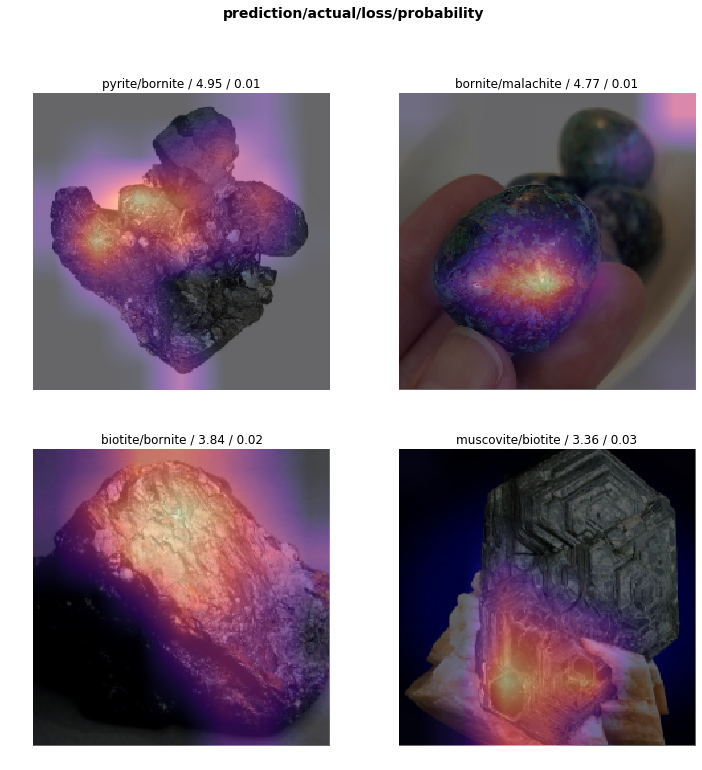

In [19]:
interp.plot_top_losses(4)

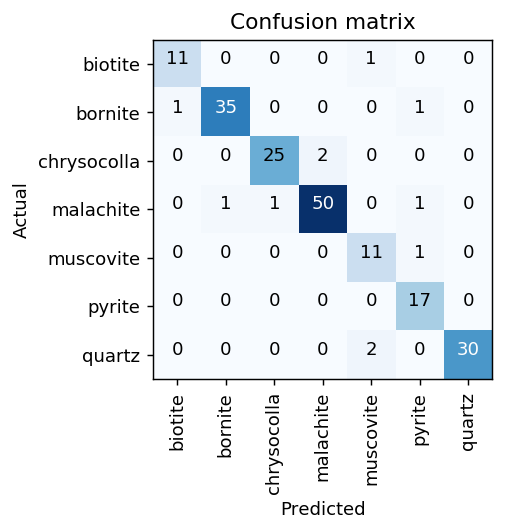

In [20]:
interp.plot_confusion_matrix(dpi=130)

number of images in training and validation sets

In [21]:
len(data.train_ds), len(data.valid_ds)

(761, 190)

total number of images

In [22]:
761 + 190

951

In [9]:
classes = data.classes

In [10]:
for clas in classes:
    print(f'{clas}: {len(get_image_files(path/clas))}')

biotite: 68
bornite: 171
chrysocolla: 162
malachite: 235
muscovite: 79
pyrite: 99
quartz: 142


In [11]:
68 + 171 + 162 + 235 + 79 + 99 + 137

951

In [12]:
0.2*951

190.20000000000002